# Barcode Detector

In [3]:
import os
import os.path as op
import numpy as np
import cv2
import matplotlib.pylab as plt

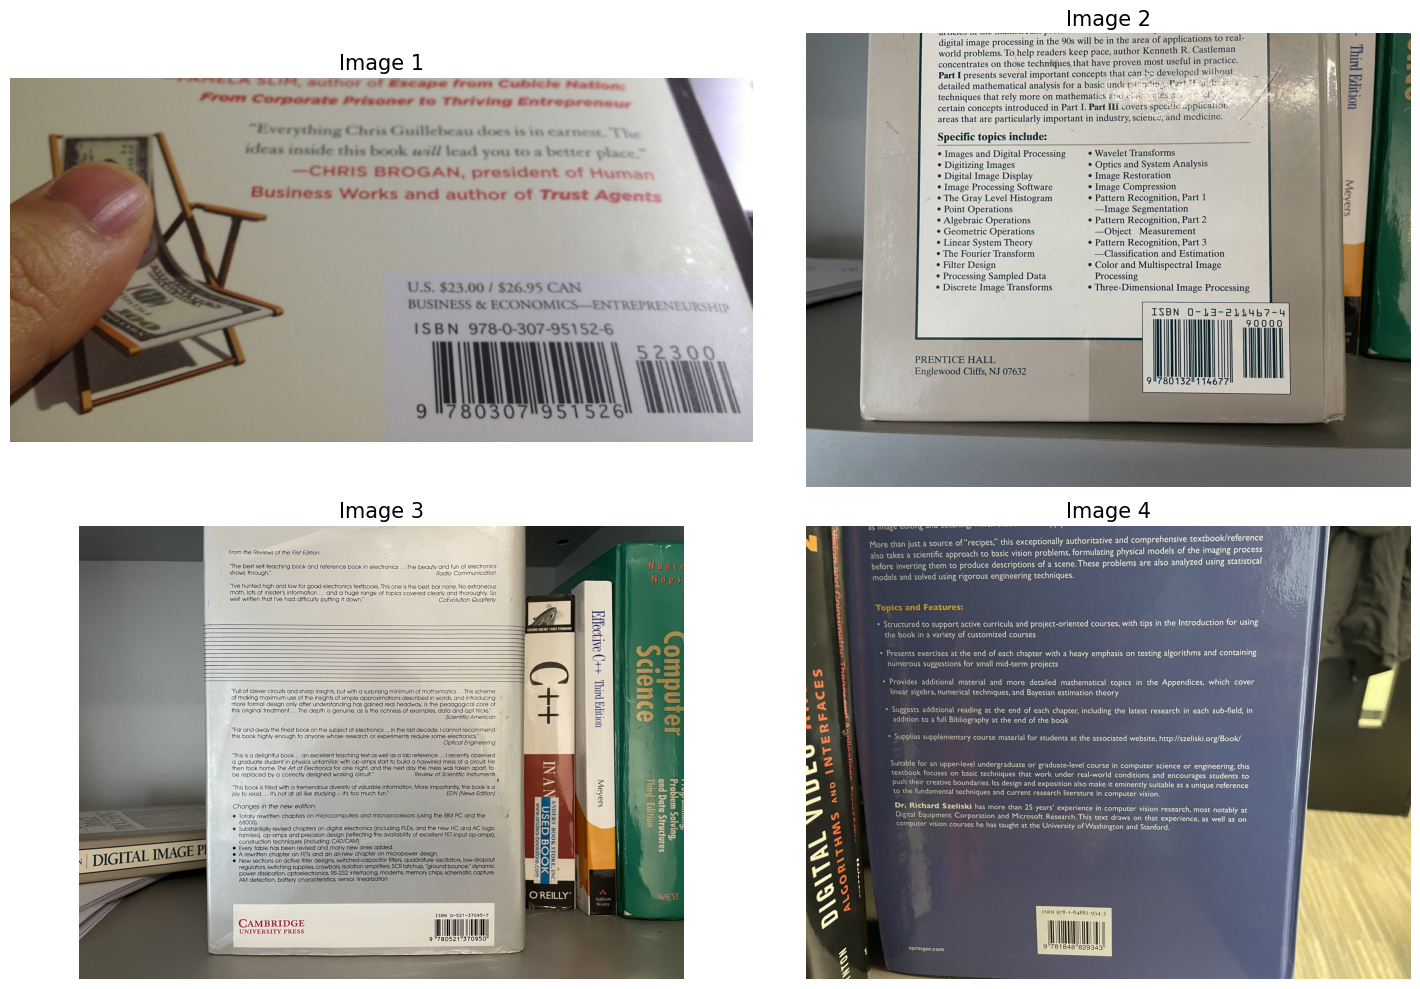

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    # TODO: Read image file "bar_codeX.jpg" where X is (i+1)
    img = cv2.imread(f"bar_code{i + 1}.jpg")
    # TODO: Convert image from BGR to RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i // 2, i % 2].imshow(img)
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1), size=15)
    axes[i // 2, i % 2].axis('off')
# TODO: Display the plot
plt.tight_layout()
plt.show()

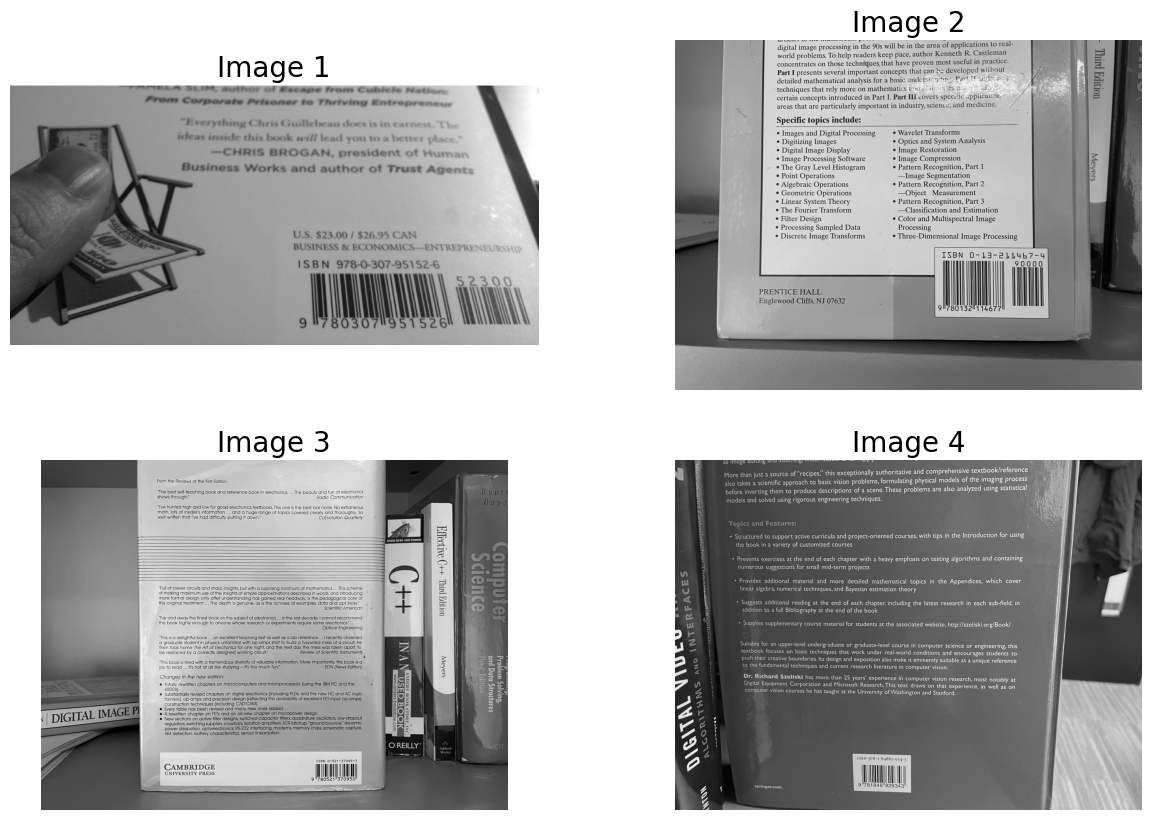

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    img = cv2.imread("bar_code" + str(i+1) + ".jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # TODO: Convert image from RGB to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # TODO: Display grayscale image with 'gray' colormap
    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1), size=20)
    axes[i // 2, i % 2].axis('off')
plt.show()

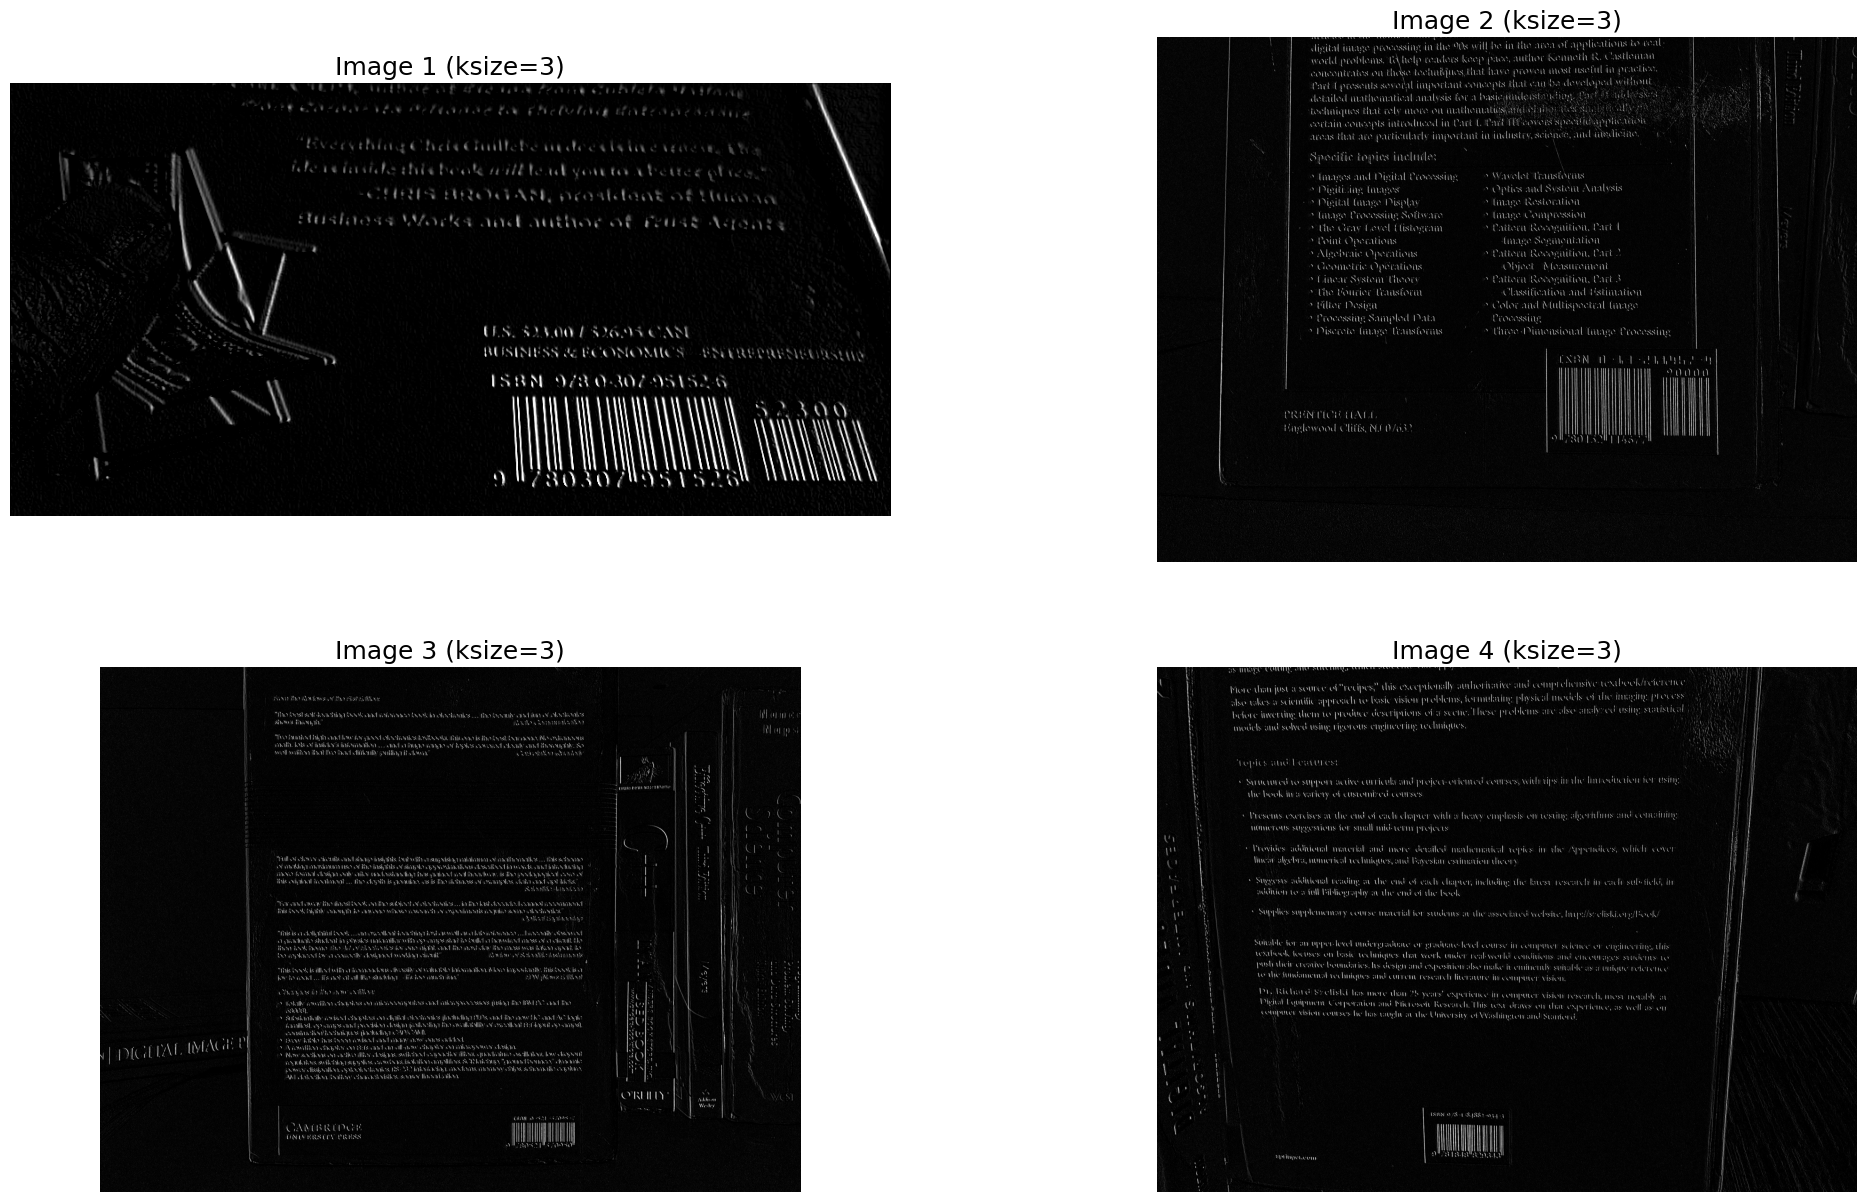

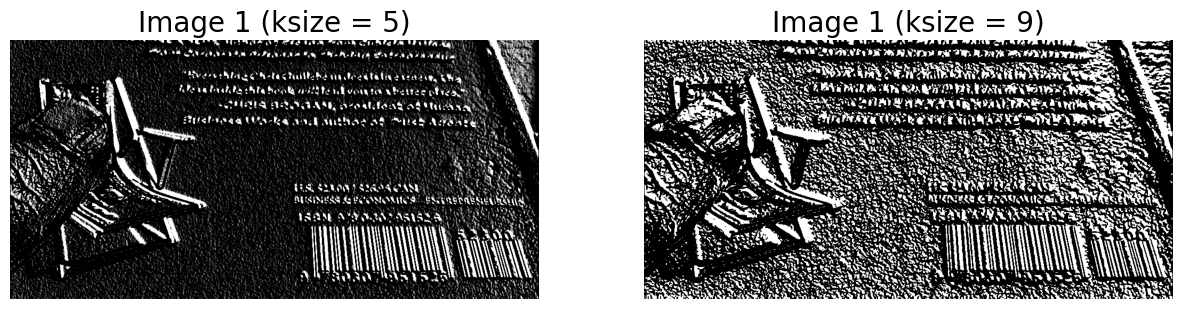

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
images = []

for i in range(4):
    img = cv2.imread("bar_code" + str(i + 1) + ".jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ksize = 3
    # TODO: Apply Sobel filter in x-direction (horizontal edges)
    img_x = cv2.Sobel(img, cv2.CV_8UC1, 1, 0, ksize=ksize)
    # TODO: Apply Sobel filter in y-direction (vertical edges)
    img_y = cv2.Sobel(img, cv2.CV_8UC1, 0, 1, ksize=ksize)
    # TODO: Subtract img_y from img_x
    img = cv2.subtract(img_x, img_y)
    # TODO: Convert result to absolute scale
    img = cv2.convertScaleAbs(img)

    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title('Image ' + str(i + 1) + ' (ksize=' + str(ksize) + ')', size=18)
    axes[i // 2, i % 2].axis('off')
    images.append(img)
plt.show()


img1 = cv2.imread("bar_code1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img_result = []

for ksize in [5, 9]:
    img_x = cv2.Sobel(img1, cv2.CV_8UC1, 1, 0, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    img_y = cv2.Sobel(img1, cv2.CV_8UC1, 0, 1, ksize=ksize, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    img = cv2.subtract(img_x, img_y)
    img = cv2.convertScaleAbs(img)

    img_result.append(img)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_result[0], cmap='gray'), plt.title('Image 1 (ksize = 5)', size=20), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_result[1], cmap='gray'), plt.title('Image 1 (ksize = 9)', size=20), plt.axis('off')

plt.show()


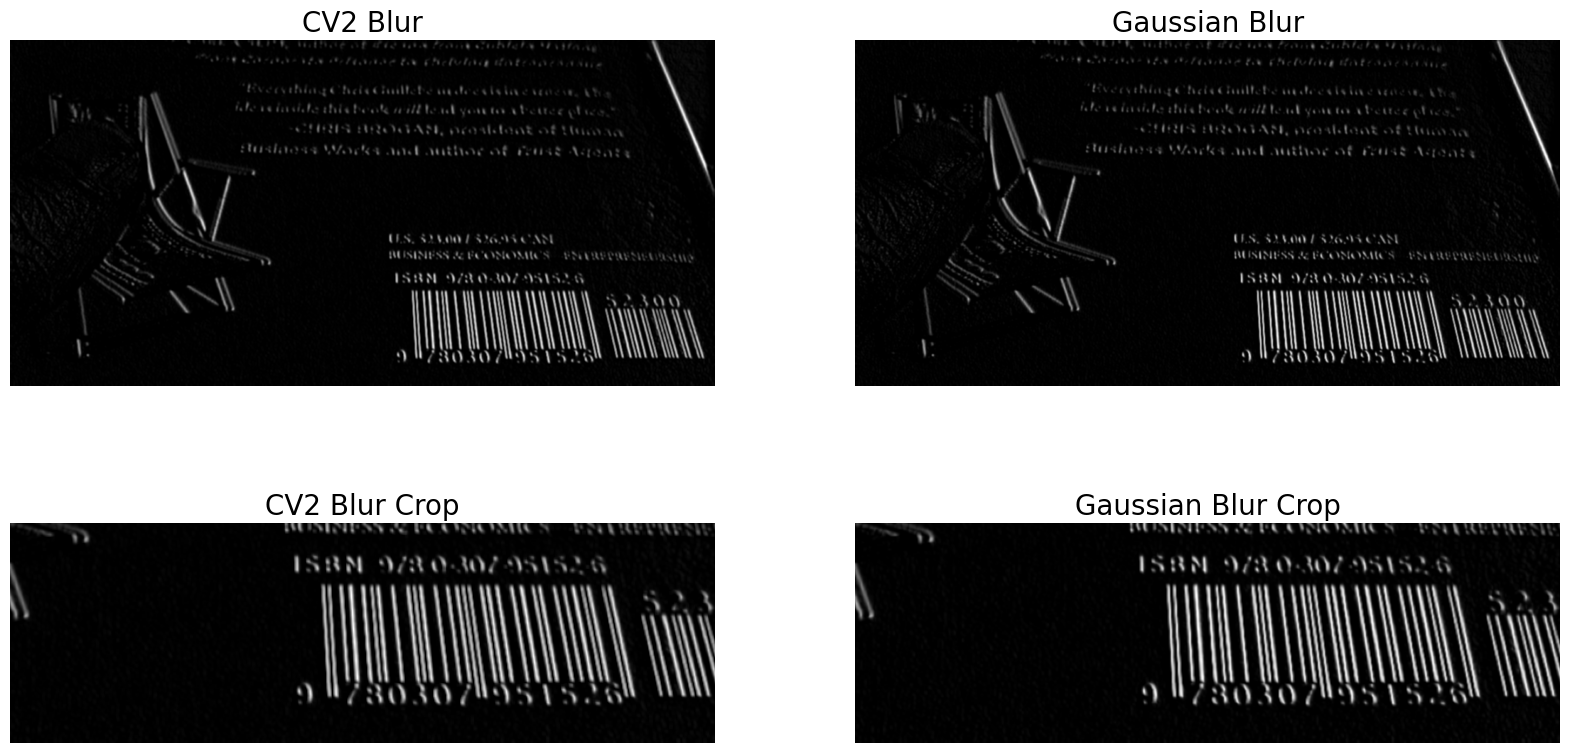

In [9]:
gauss_images = []

for i in range(4):

    blur_img = cv2.blur(images[0], (3, 3))

    gauss_blur_img = cv2.GaussianBlur(images[i], (3, 3), 0)
    gauss_images.append(gauss_blur_img)

    blur_crop = blur_img[300:500, 300:900]
    gauss_blur_crop = gauss_images[0][300:500, 300:900]

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1), plt.imshow(blur_img, cmap='gray'), plt.title('CV2 Blur', size=20), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(gauss_images[0], cmap='gray'), plt.title('Gaussian Blur', size=20), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(blur_crop, cmap='gray'), plt.title('CV2 Blur Crop', size=20), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(gauss_blur_crop, cmap='gray'), plt.title('Gaussian Blur Crop', size=20), plt.axis('off')
plt.show()



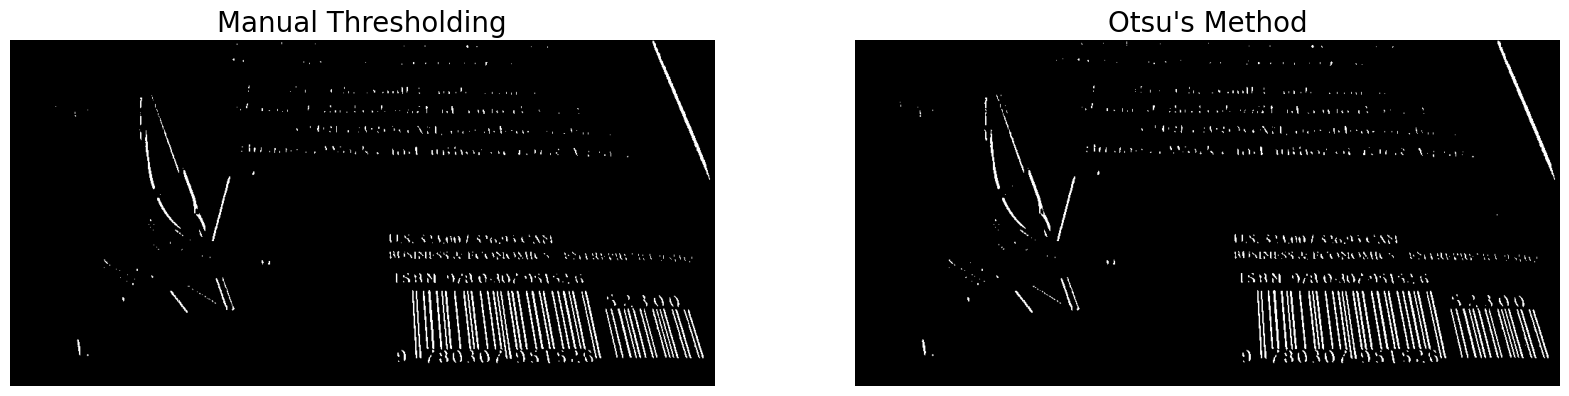

In [10]:
manual_thresh_img = []
otsu_thresh_img = []

for i in range(4):
    # TODO: Apply manual thresholding with threshold=100, maxval=255, type=cv2.THRESH_BINARY
    manual_threshold, manual_threshed = cv2.threshold(images[i], 100, 255, cv2.THRESH_BINARY)
    manual_thresh_img.append(manual_threshed)

    # TODO: Apply Otsu's thresholding with initial threshold=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
    otsu_threshold, otsu_threshed = cv2.threshold(images[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_thresh_img.append(otsu_threshed)


plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1), plt.imshow(manual_thresh_img[0], cmap='gray'), plt.title('Manual Thresholding', size=20), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(otsu_thresh_img[0], cmap='gray'), plt.title("Otsu's Method", size=20), plt.axis('off')
plt.show()

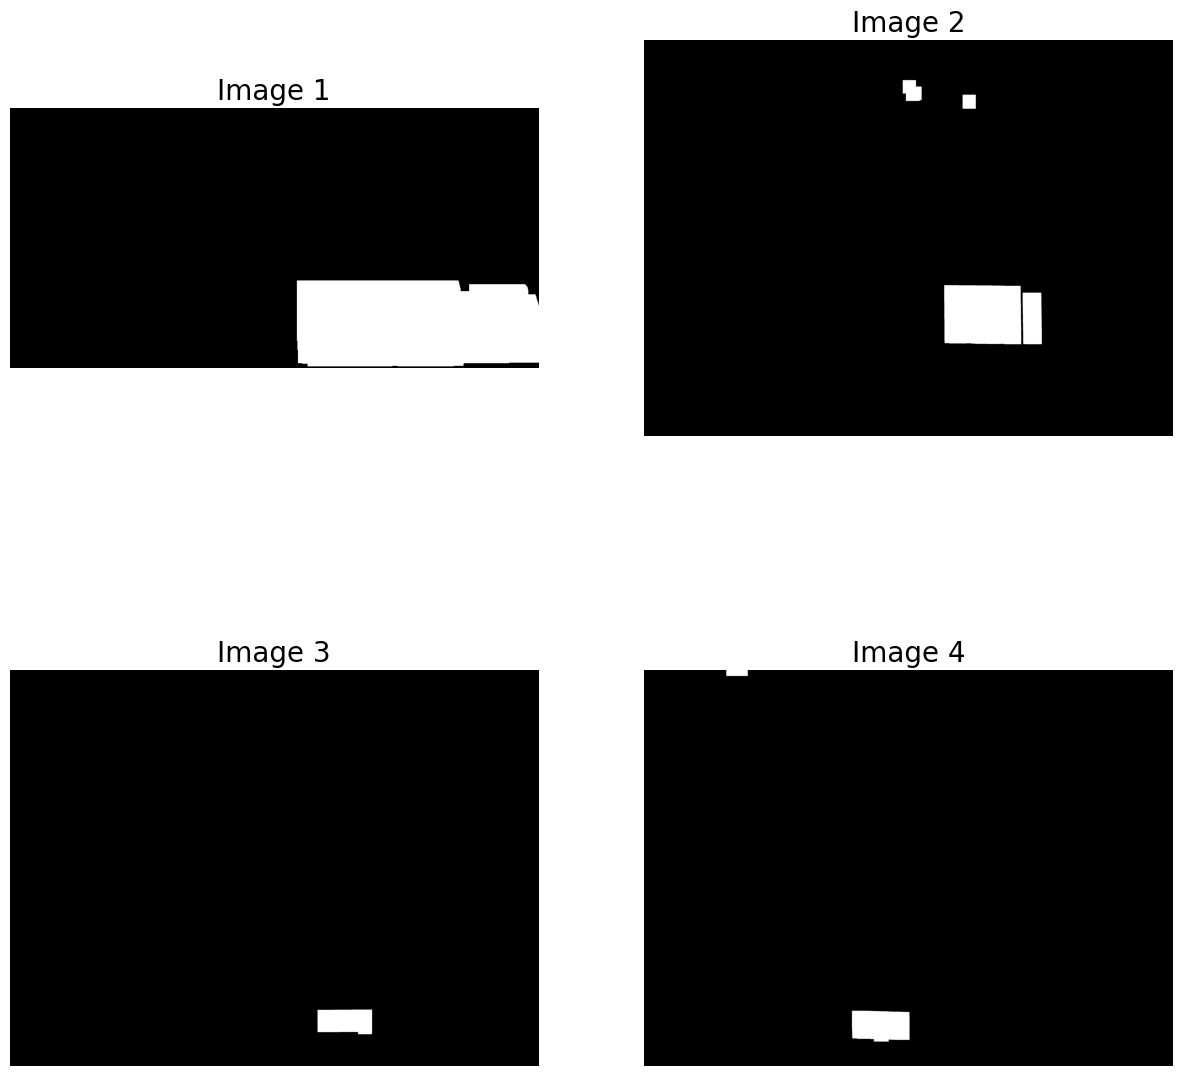

In [14]:
# Morphological Operations
cleaned_images = []

# TODO: Create a rectangular structuring element of size (21, 7)
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))

for i in range(4):
    # TODO: Apply morphological closing with the structuring element
    closed_img = cv2.morphologyEx(otsu_thresh_img[i], cv2.MORPH_CLOSE, struct)
    # TODO: Apply erosion with 20 iterations
    erosion_img = cv2.erode(closed_img, None, iterations=20)
    # TODO: Apply dilation with 50 iterations
    dilation_img = cv2.dilate(erosion_img, None, iterations=50)
    cleaned_images.append(dilation_img)

# TODO: Display all cleaned images in a 2x2 subplot
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cleaned_images[i], cmap='gray')
    plt.title('Image ' + str(i + 1), size=20)
    plt.axis('off')

plt.show()



C:\Users\falla\AppData\Local\Temp\ipykernel_4656\84184011.py:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


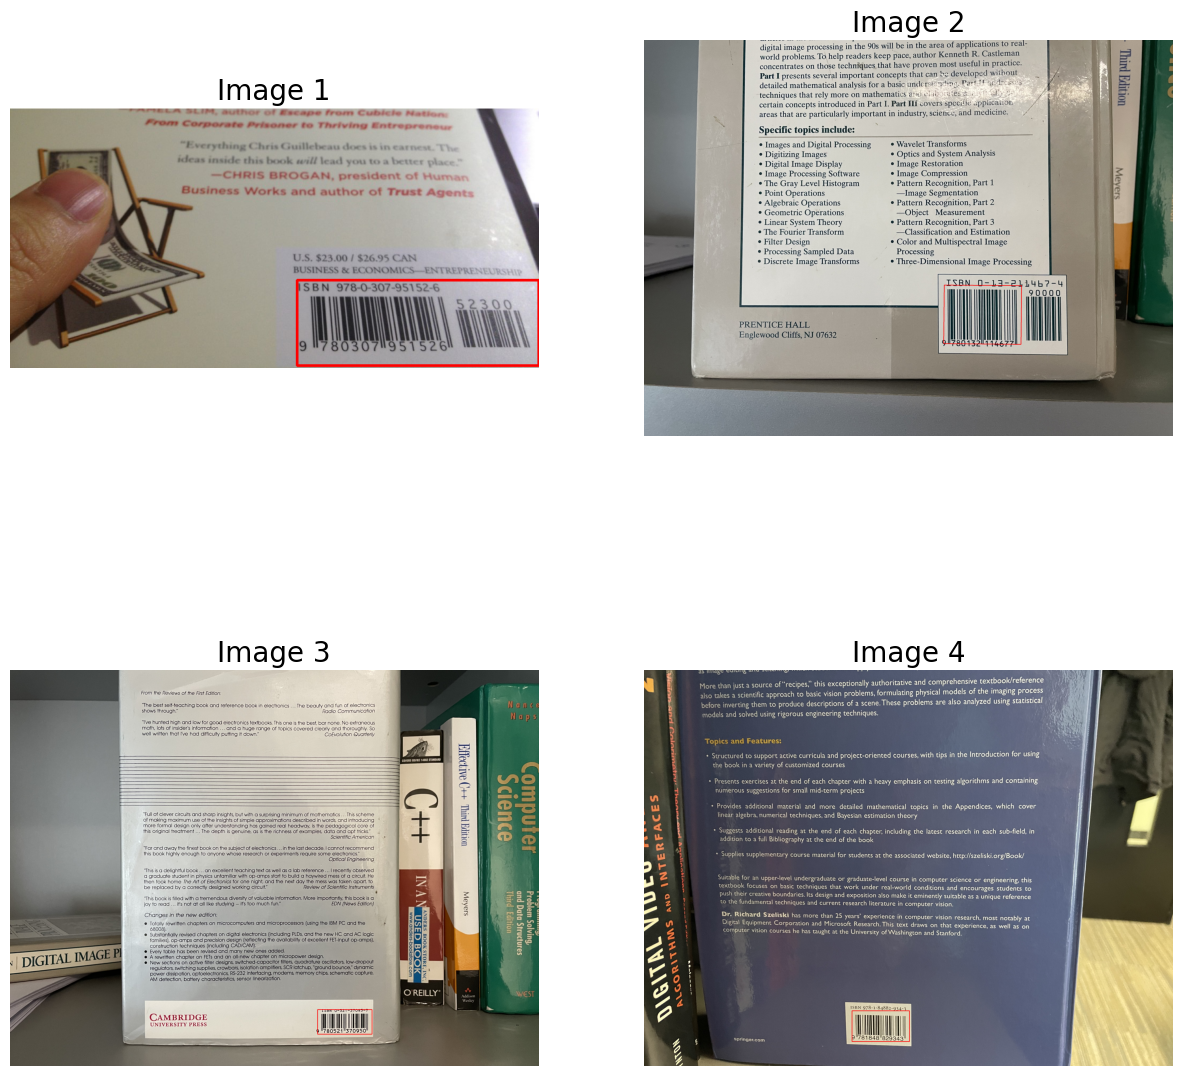

In [16]:
# Contour Detection and Bounding Box
final_images = []

for i in range(4):
    # TODO: Find external contours in cleaned_images[i] using cv2.RETR_EXTERNAL and cv2.CHAIN_APPROX_SIMPLE
    contours, _ = cv2.findContours(cleaned_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # TODO: Sort contours by area in descending order
    sort_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    # TODO: Compute minimum area rectangle for the largest contour
    # print(sort_contours)
    rotated_bounding_box = cv2.minAreaRect(sort_contours[0])
    box = cv2.boxPoints(rotated_bounding_box)
    box = np.int0(box)

    # TODO: Read original image and draw the bounding box in red (BGR: (0, 0, 255), thickness=3)
    original_image = cv2.imread(f"bar_code{i + 1}.jpg")
    bounding_box = bounding_box = cv2.drawContours(original_image.copy(), [box], 0, (0, 0, 255), 3)
    final_images.append(bounding_box)

# TODO: Display all final images in a 2x2 subplot, converting from BGR to RGB
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor((final_images[i]), cv2.COLOR_BGR2RGB))
    plt.title('Image ' + str(i + 1), size=20)
    plt.axis('off')

plt.show()
